# Correlation Analysis for Yearly Data

<a id='top'></a>

<a href=#readdata>Read Data</a>  

<a href=#correlation>Correlation</a>

<a href=#remove_columns>Remove Columns</a>

<a href=#conclusions>Conclusions</a>

<a href=#end>End</a>


In [1]:
# Ignore 'dask' warning

import pandas as pd
import gcsfs
from google.cloud import storage
from pandas import DataFrame
from IPython.display import HTML
from google.cloud.storage import Blob
import datalab.storage as gcs_datalab
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns


<a id='readdata'></a>

# Read in Yearly Aggregated data
<a href=#top>Top</a>

In [2]:
# Setting up constants. All required
project = 'graydon-moving-indicator'
bucket_name = 'graydon-data'

# Initializing bucket
fs = gcsfs.GCSFileSystem(project='graydon-moving-indicator')
gcs = storage.Client()
bucket = gcs.get_bucket(bucket_name)


# Setting up dictionary of column types
dtype={ 'id_company'  :np.float64,
        'id_branch'    :np.int64, 
        'code_sbi_2'         : np.float64, 
        'code_sbi_1'          :object, 
        'has_relocated':bool,
        'has_relocated_next_year ' : bool,
        'qty_address_mutations_total' :np.float64,
        #'has_name_change'  :bool,
        'ratio_operating_result_consolidated_operating_result': np.float64,
        'ratio_revenue_consolidated_revenue': np.float64,
        'qty_green_flags'   :np.float64,
        'qty_orange_flags'   :np.float64,
        'qty_red_flags'   :np.float64,
        'A'   :np.float64,
        'AA'   :np.float64,
        'AAA'   :np.float64,
        'B'   :np.float64,
        'BB'   :np.float64,
        'BBB'   :np.float64,
        'C'   :np.float64,
        'CC'   :np.float64,
        'CCC'   :np.float64,
        'D'   :np.float64,
        'NR'   :np.float64,
        'company_age'   :np.float64,
        'years_since_last_amt_consolidated_operating_result'   :np.float64,
        'years_since_last_amt_consolidated_revenue'   :np.float64,
        'years_since_last_amt_operating_result'   :np.float64,
        'years_since_last_qty_employees'   :np.float64,
        'years_since_last_amt_revenue'   :np.float64,
        'delta_qty_employees'   :np.float64,
        'delta_qty_issued_credit_reports'   :np.float64,
        'delta_score_payment_assessment'   :np.float64,
        'delta_score_payment_assessment'   :np.float64,
        'code_legal_form_has_changed ' : bool,
        'is_discontinued_any ' : bool,
        'has_financial_calamity ' : bool,
        'mean_amt_consolidated_operating_result'   :np.float64,
        'mean_amt_consolidated_revenue'   :np.float64,
        'mean_amt_operating_result'   :np.float64,
        'mean_amt_revenue'   :np.float64,
        'mean_qty_employees'   :np.float64,
        'mean_qty_issued_credit_reports'   :np.float64,
        'mean_score_payment_assessment'   :np.float64,
        'mean_score_pd'   :np.float64,
        'qty_address_mutations_year'   :np.float64,
        'qty_started_names_year'   :np.float64,
        'qty_stopped_names_year'   :np.float64,
        'qty_board_changes_year'   :np.float64,
        'variance_qty_issued_credit_reports'   :np.float64,
        'variance_score_payment_assessment'   :np.float64,
        'variance_score_pd'   :np.float64
      }


# Setting up dictionary of column types
parse_dates= ['date_month', 'date_relocation_last', 'date_relocation_penultimate']

def read_one_year_from_bucket_merged_csv(year, dir_prefix = ''):
    """ Reads a whole year of data from the already merged files """
    full_year_df = pd.DataFrame()
    print('Starting with year: ', year)
    print(dir_prefix)
    blob_list = list(bucket.list_blobs(prefix=dir_prefix))    
    for blob in blob_list:  
        print("blob", blob.name)
        if year in blob.name:
            print('Processing file: ', blob.name)
            with fs.open('graydon-data/' + blob.name) as f:
                full_year_df = pd.read_csv(f, sep=',', index_col=0, dtype=dtype, parse_dates=parse_dates)   
        print('The number of rows so far is: ', full_year_df.shape[0])
    return full_year_df



In [3]:

data_df = read_one_year_from_bucket_merged_csv(
    dir_prefix= 'including_scores/merged_per_year/aggregated'
                                                   , year = '2017')

Starting with year:  2017
including_scores/merged_per_year/aggregated
blob including_scores/merged_per_year/aggregated/
The number of rows so far is:  0
blob including_scores/merged_per_year/aggregated/2017_merged_cleaned.csv
Processing file:  including_scores/merged_per_year/aggregated/2017_merged_cleaned.csv


/home/mrodriguezlara/graydon/graydon-moving/lib/python3.5/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


The number of rows so far is:  1965800


In [4]:
data_df.columns

Index(['id_branch', 'date_month', 'id_company', 'code_sbi_2', 'code_sbi_1',
       'qty_address_mutations_total', 'has_relocated', 'has_name_change',
       'date_relocation_last', 'date_relocation_penultimate',
       'ratio_operating_result_consolidated_operating_result',
       'ratio_revenue_consolidated_revenue', 'qty_green_flags',
       'qty_orange_flags', 'qty_red_flags', 'A', 'AA', 'AAA', 'B', 'BB', 'BBB',
       'C', 'CC', 'CCC', 'D', 'NR', 'company_age',
       'years_since_last_amt_consolidated_operating_result',
       'years_since_last_amt_consolidated_revenue',
       'years_since_last_amt_operating_result',
       'years_since_last_qty_employees', 'years_since_last_amt_revenue',
       'delta_qty_employees', 'delta_qty_issued_credit_reports',
       'delta_score_payment_assessment', 'code_legal_form_has_changed',
       'is_discontinued_any', 'has_financial_calamity',
       'mean_amt_consolidated_operating_result',
       'mean_amt_consolidated_revenue', 'mean_amt_oper

<a id='correlation'></a>
# Correlation Analysis:

<a href=#top>Top</a>

In [5]:
# Compute the correlation matrix
corr_df = data_df.corr()


In [6]:
corr_df

,id_branch,id_company,code_sbi_2,qty_address_mutations_total,has_relocated,has_name_change,ratio_operating_result_consolidated_operating_result,ratio_revenue_consolidated_revenue,qty_green_flags,qty_orange_flags,...,mean_qty_issued_credit_reports,mean_score_payment_assessment,mean_score_pd,qty_address_mutations_year,qty_started_names_year,qty_stopped_names_year,qty_board_changes_year,variance_qty_issued_credit_reports,variance_score_payment_assessment,variance_score_pd
id_branch,1.000000,0.641871,0.145408,0.024589,0.026074,0.024607,-0.001788,0.005608,-0.027766,0.068356,...,0.040754,-0.083461,0.035666,0.181662,0.029644,-0.000239,0.039906,0.044026,-0.183405,0.091305
id_company,0.641871,1.000000,0.230632,-0.014851,0.023319,0.003072,0.004103,0.010659,-0.064885,0.024465,...,-0.153414,0.034113,0.047783,0.083908,0.015222,0.000007,-0.032211,-0.111164,-0.005263,0.065523
code_sbi_2,0.145408,0.230632,1.000000,-0.005661,0.014909,0.001765,-0.006033,0.004638,-0.102270,-0.010826,...,-0.061995,0.147097,0.184378,0.046803,-0.006939,0.000382,0.019845,-0.045859,0.136182,0.180710
qty_address_mutations_total,0.024589,-0.014851,-0.005661,1.000000,0.062453,0.014506,-0.000393,-0.001277,0.009092,-0.000366,...,0.032411,-0.004806,-0.011831,0.069309,0.001086,-0.000024,0.027258,0.018337,-0.010700,-0.008480
has_relocated,0.026074,0.023319,0.014909,0.062453,1.000000,0.040740,-0.000753,-0.001162,0.005243,0.002637,...,-0.005605,0.019363,-0.012826,0.262065,0.012301,-0.000086,0.007625,-0.004272,0.010570,-0.009364
has_name_change,0.024607,0.003072,0.001765,0.014506,0.040740,1.000000,-0.000875,-0.001417,0.005998,0.004886,...,0.034322,-0.016396,-0.007682,0.030948,0.028712,-0.000048,0.048252,0.028452,-0.027660,-0.000718
ratio_operating_result_consolidated_operating_result,-0.001788,0.004103,-0.006033,-0.000393,-0.000753,-0.000875,1.000000,0.343437,-0.002588,0.022031,...,0.001199,-0.002288,-0.002364,0.000533,-0.000796,-0.000081,-0.003424,-0.002667,-0.000733,-0.002765
ratio_revenue_consolidated_revenue,0.005608,0.010659,0.004638,-0.001277,-0.001162,-0.001417,0.343437,1.000000,-0.020275,0.082052,...,0.006008,-0.000934,-0.002208,0.005306,-0.000720,-0.000079,-0.007285,-0.003489,0.001732,-0.003202
qty_green_flags,-0.027766,-0.064885,-0.102270,0.009092,0.005243,0.005998,-0.002588,-0.020275,1.000000,-0.099910,...,0.154889,-0.172786,-0.736013,0.014322,0.023716,0.000915,0.067859,0.129680,-0.096008,-0.768539
qty_orange_flags,0.068356,0.024465,-0.010826,-0.000366,0.002637,0.004886,0.022031,0.082052,-0.099910,1.000000,...,0.017777,-0.103051,-0.011525,0.025300,0.018090,-0.000062,0.018336,0.017638,-0.093658,-0.012364


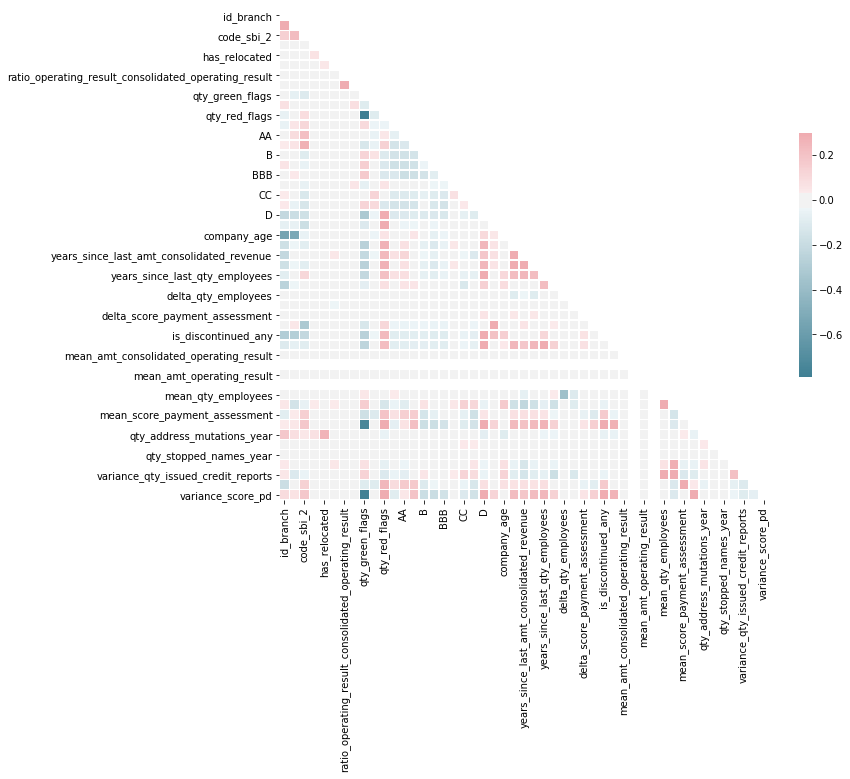

In [7]:

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


<a id='remove_columns'</a>
# Limit Number of Features

<a href=#top>Top</a>



Remove some columns with no correlation (b/c it is constant, or categorical...)

In [8]:
# Compute the correlation matrix
corrII_df = data_df.drop(columns=['id_branch',
                                  'id_company',
                                  'has_relocated'
                                  ]).corr()


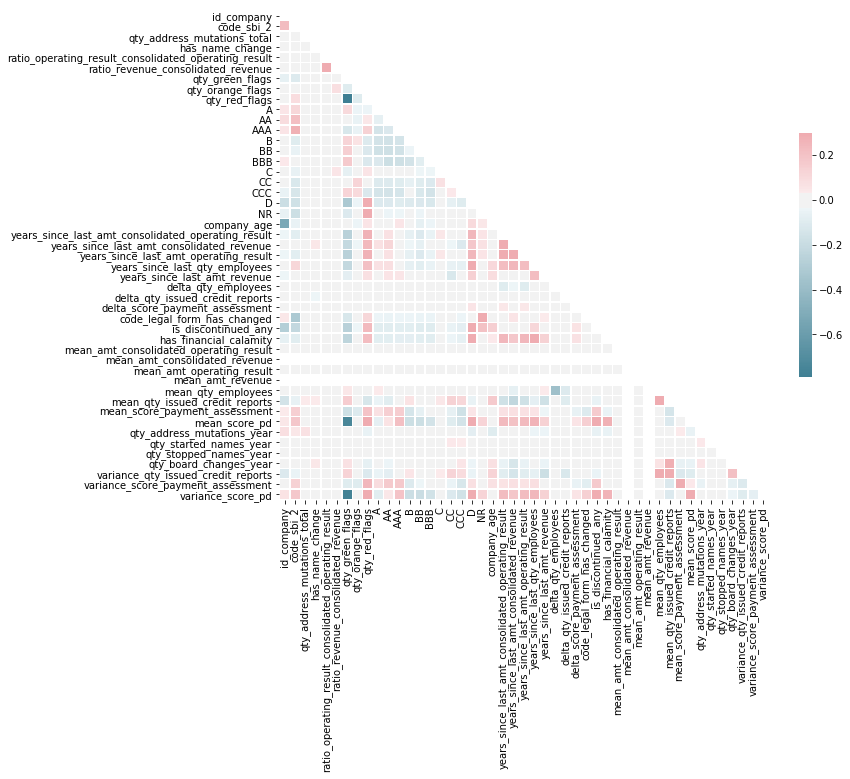

In [9]:

# Generate a mask for the upper triangle
mask = np.zeros_like(corrII_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrII_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


<a id='conclusions'></a>
# Conclusions:

- The 'has_relocated' column has some correlation with 'score_payment_assessment' column, and very little correlation with any other column.  
- 'The 'score_pd' and 'has_increased_risk' are highly correlated - perhaps only use one or the other during modelling.
-  There is a strong (negative) correlation between 'perc_credit_limit_adjustment' and 'financial_calamity_outcome'.

<a id='end'></a>

<a href=#top>Top</a>

# End